In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import pandas as pd

In [ ]:

# Aufgabe 5.2
# Calculate n', the equivalent number of independent samples,
# for the two sets of minimum air temperature in Table A1

# Ithaca Tmin
# Canadaigua Tmin


In [3]:
# A1 Daily Precipitation and Temperature (F) Observations
# at Ithaca and Canadaigua, New York, for January 1987

Tmin_Ithaca = np.array([19,25,22,-1,4,14,21,22,23,27,29,25,29,15,29,24,0,2,26,17,19,9,20,-6,-13,-13,-11,-4,-4,11,23]) 
Tmin_Canadaigua = np.array([28,28,26,19,16,24,26,24,24,29,29,27,31,26,38,23,13,14,28,19,19,17,22,2,4,5,7,8,14,14,23]) # Canandaigua T max

print(Tmin_Ithaca.shape)
print(Tmin_Canadaigua.shape)


(31,)
(31,)


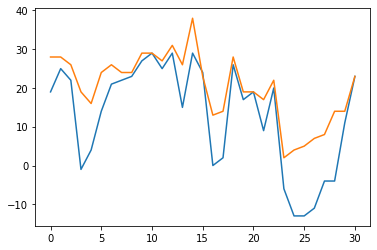

In [5]:
plt.plot(Tmin_Ithaca)
plt.plot(Tmin_Canadaigua)

0    1.000000
1    0.661614
2    0.486484
3    0.371313
4    0.385928
5    0.161263
dtype: float64
0    1.000000
1    0.643781
2    0.378864
3    0.262221
4    0.179727
5   -0.004134
dtype: float64


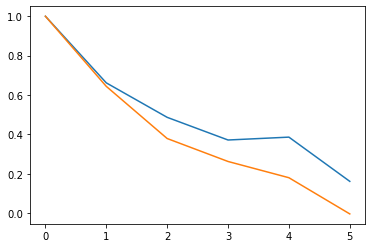

In [9]:
#np.vectorize(res.autocorr)(np.arange(0,len(res)-1))
rho_lag_cndg=pd.Series(sm.tsa.acf(Tmin_Canadaigua, nlags=5,fft=False))
rho_lag_ithc=pd.Series(sm.tsa.acf(Tmin_Ithaca, nlags=5,fft=False))

print(rho_lag_cndg)
plt.plot(rho_lag_cndg)
print(rho_lag_ithc)
plt.plot(rho_lag_ithc)

In [12]:
n_eff_itch=Tmin_Ithaca.shape[0]*(1-rho_lag_ithc[1])/(1+rho_lag_ithc[1])
n_eff_cndg=Tmin_Canadaigua.shape[0]*(1-rho_lag_cndg[1])/(1+rho_lag_cndg[1])

print('n: ',Tmin_Canadaigua.shape[0])
print('lag-1 Autocorrelation rho(1): ',rho_lag_ithc[1])
print('n_eff @ Ithaca: ',n_eff_itch)

print('n Canadaigua: ',Tmin_Canadaigua.shape[0])
print('lag-1 Autocorrelation rho(1): ',rho_lag_cndg[1])
print('n_eff @ Canadaigua: ',n_eff_cndg)


n:  31
lag-1 Autocorrelation rho(1):  0.6437814521926671
n_eff @ Ithaca:  6.717909468620163
n Canadaigua:  31
lag-1 Autocorrelation rho(1):  0.6616135738716383
n_eff @ Canadaigua:  6.313128019011704


(array([3., 1., 3., 2., 1., 2., 2., 4., 6., 7.]),
 array([-13. ,  -8.8,  -4.6,  -0.4,   3.8,   8. ,  12.2,  16.4,  20.6,
         24.8,  29. ]),
 <BarContainer object of 10 artists>)

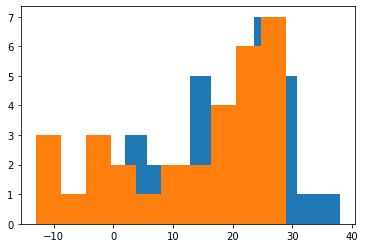

In [4]:
plt.hist(Tmin_Canadaigua)
plt.hist(Tmin_Ithaca)

In [20]:
Tmin_data = pd.DataFrame({'Tmin_Ithaca':Tmin_Ithaca,'Tmin_Canadaigua':Tmin_Canadaigua})

In [21]:
Tmin_data

,Tmin_Ithaca,Tmin_Canadaigua
0,19,28
1,25,28
2,22,26
3,-1,19
4,4,16
5,14,24
6,21,26
7,22,24
8,23,24
9,27,29


(array([3., 1., 3., 2., 1., 2., 2., 4., 6., 7.]),
 array([-13. ,  -8.8,  -4.6,  -0.4,   3.8,   8. ,  12.2,  16.4,  20.6,
         24.8,  29. ]),
 <BarContainer object of 10 artists>)

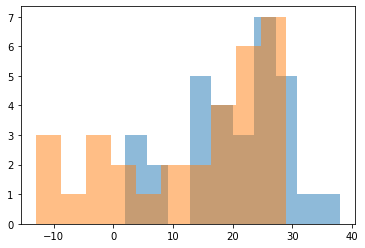

In [27]:

plt.hist(Tmin_data['Tmin_Canadaigua'],alpha=0.5)
plt.hist(Tmin_data['Tmin_Ithaca'],alpha=0.5)


/Users/PEGASUS/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/PEGASUS/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tmin_Ithaca', ylabel='Density'>

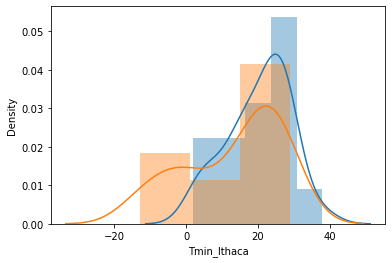

In [29]:
import seaborn as sns

sns.distplot(Tmin_data['Tmin_Canadaigua'])
sns.distplot(Tmin_data['Tmin_Ithaca'])

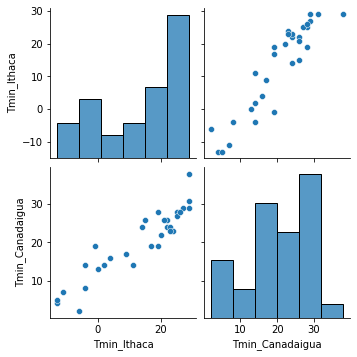

In [31]:
sns.pairplot(Tmin_data)

/Users/PEGASUS/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


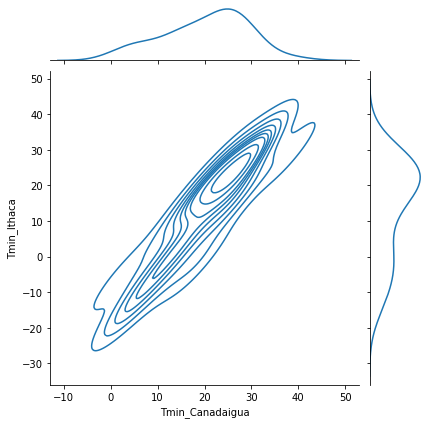

In [35]:
sns.jointplot('Tmin_Canadaigua','Tmin_Ithaca',Tmin_data,kind='kde')

In [38]:
mean_ithc=np.mean(Tmin_Ithaca)
mean_cndg=np.mean(Tmin_Canadaigua)
std_ithc=np.std(Tmin_Ithaca)
std_cndg=np.std(Tmin_Canadaigua)

print('Mean at Itaca',mean_ithc)
print('Mean at Canadaigua',mean_cndg)
print('Stdev at Itaca',std_ithc)
print('Stdev at Candadaigua',std_cndg)

Mean at Itaca 13.0
Mean at Canadaigua 20.225806451612904
Stdev at Itaca 13.397159063314204
Stdev at Candadaigua 8.664758721653737


In [85]:
#Transformation of the two independent batches into Z-transform of Gaussian

z = abs(mean_cndg-mean_ithc)/np.sqrt(std_ithc**2/31+std_cndg**2/31)

print('Gaussian z-Transform: ', z)

Gaussian z-Transform:  2.521566679550801


In [82]:
# We'll bring in scipy to do the calculation of probability from the Z-table

print('z-score cumulative probability:',stats.norm.cdf(z))

# We need the probability from the right side, so we'll flip it!
print('One-sided Cumulative P(z>Z): 1-(cumulative probability of z-score):',(1 - stats.norm.cdf(z)))
p_one_sided = (1 - stats.norm.cdf(z))
print('Two-sided Cumulative P(Z1>z>Z2): (1-(cumulative probability of z-score))*2:',(1 - stats.norm.cdf(z))*2)
p_two_sided = p_one_sided*2

z-score cumulative probability: 0.9984111303526352
One-sided Cumulative P(z>Z): 1-(cumulative probability of z-score): 0.0015888696473648212
Two-sided Cumulative P(Z1>z>Z2): (1-(cumulative probability of z-score))*2: 0.0031777392947296423


In [75]:
## Calculate the t-statistics

mean_ithc=np.mean(Tmin_Ithaca)
mean_cndg=np.mean(Tmin_Canadaigua)
std_ithc=np.std(Tmin_Ithaca)
std_cndg=np.std(Tmin_Canadaigua)
N=31

t = (mean_cndg - mean_ithc)/(np.sqrt(std_ithc**2/N+std_ithc**2/N))



## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 4

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(Tmin_Canadaigua,Tmin_Ithaca)
print("t = " + str(t2))
print("p = " + str(p2))


t = 2.1234373880013613
p = 0.03799453158680666
t = 2.4805628626520564
p = 0.015939800473889678


tcrit 2.521566679550801


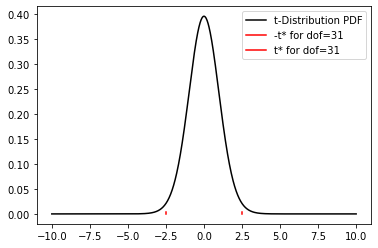

In [86]:
#https://stackoverflow.com/questions/42331555/having-trouble-visualizing-a-t-distribution-in-python
## Basic T-Distribution
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

## Setup      
dof = 31        # Degrees of freedom
alpha = 0.01    # Significence level
ntails = 2      # Number of tails 

## Calculate critical t-score
tcrit = z #2.52  #abs(st.t.ppf(alpha/ntails, dof))
print('tcrit',tcrit)
# +=2.068

plt.figure()
xs = np.linspace(-10,10,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k', label="t-Distribution PDF")

## Plot some vertical lines representing critical t-score cutoff
#critline = np.linspace(0,alpha/ntails)  # y range for critical line, AKA probability from 0-p*
critline = np.linspace(0,p_two_sided)  # y range for critical line, AKA probability from 0-p*
xs_1 = len(critline) * [-tcrit]         # X ranges for plotting
xs_2 = len(critline) * [tcrit]
plt.plot(xs_1, critline, 'r', label="-t* for dof=31")
plt.plot(xs_2, critline,'r', label="t* for dof=31")
plt.legend()